In [339]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [340]:
df = pd.read_csv ( "forestfires.csv", index_col= False)
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [341]:
for col_name in df.columns:
    print( "Total NaN: ", df[col_name].isna().sum())
    print( "Total null: ", df[col_name].isnull().sum())
    print( "Total NaN: ", df[col_name].dtype)
    print("+"*10)


Total NaN:  0
Total null:  0
Total NaN:  int64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  int64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  object
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  object
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  int64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++
Total NaN:  0
Total null:  0
Total NaN:  float64
++++++++++


In [342]:
def convert_day(day: str ) -> int:
    day_dict= {
        "sun": 0,
        "mon": 1,
        "tue": 2,
        "wed": 3,
        "thu": 4,
        "fri": 5,
        "sat": 6,
         
    }
    return day_dict[day]

In [343]:
def convert_month(month: str ) -> int:
    day_dict= {
        "jan": 0,
        "feb": 1,
        "mar": 2,
        "apr": 3,
        "may": 4,
        "jun": 5,
        "jul": 6,
        "aug": 7,
        "sep": 8,
        "oct": 9,
        "nov": 10,
        "dec": 11,
       
    }
    return day_dict[month]

In [344]:
df["day"] = df ["day"].apply(convert_day)

In [345]:
df.head(5)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [346]:
df["month"] = df ["month"].apply(convert_month)

In [347]:
df.head(5)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [348]:
class LinerRegression:
    def rmse (self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        return np.square(delta).mean()**0.5
    def fit (self, X: np.ndarray, y: np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta_: np.ndarray = inv_cov @(  X.T @ y)
    def predict (self, X: np.ndarray) ->np.ndarray:
        y_pred = self.theta_.T @ X.T
        return y_pred

In [349]:
lr = LinerRegression()

In [350]:
X_y = df.to_numpy()

In [351]:
X_y.shape

(517, 13)

In [352]:
N = df.shape[0]
X_y_train, X_y_test = np.split( X_y, indices_or_sections=[int(0.8*N)])

In [353]:
X_train, X_test = X_y_train[:, :-1],X_y_test[:, :-1]
X_train.shape, X_test.shape

((413, 12), (104, 12))

In [354]:
Y_train, Y_test = X_y_train[:, -1],X_y_test[:, -1]
Y_train.shape, Y_test.shape

((413,), (104,))

In [355]:
lr.fit(X_train, Y_train)

In [356]:
lr.theta_

array([ 0.93018464, -0.32782135,  2.99588802,  1.6991748 , -0.05846919,
        0.11600248, -0.02856738, -0.90055165,  0.4564032 , -0.17594391,
        0.06405963, -6.82128131])

In [357]:
lr.theta_.shape

(12,)

In [358]:
y_pred = lr.predict(X_test)

In [359]:
lr.rmse(y_pred, Y_test)

79.42418905273836

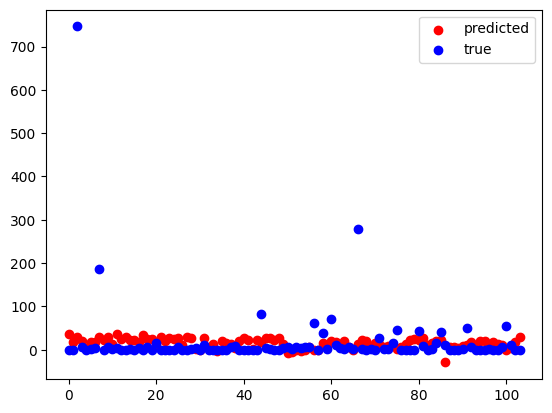

In [360]:
x_axis = np.array(range(X_test.shape[0]))
plt.scatter( x_axis, y_pred, c = "r", label = "predicted")
plt.scatter(x_axis, Y_test, c ="b", label = "true")
plt.legend()

In [361]:
removed_month_df = df[['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
                       'rain', 'area']]

In [362]:
X_y = removed_month_df.to_numpy()

In [363]:
df["FFMC"] = (df["FFMC"] - df["FFMC"].mean())/ df["FFMC"].std()
df["DC"] = (df["DC"] - df["DC"].mean()) / df["DC"].std()

In [364]:
for col in [ "FFMC","DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
for col in ["FFMC","DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]:
    print(f"{col}: mean={df[col].mean():.5f}, std={df[col].std():.5f}")


FFMC: mean=0.00000, std=1.00000
DMC: mean=0.00000, std=1.00000
DC: mean=0.00000, std=1.00000
ISI: mean=0.00000, std=1.00000
temp: mean=0.00000, std=1.00000
RH: mean=0.00000, std=1.00000
wind: mean=-0.00000, std=1.00000
rain: mean=0.00000, std=1.00000


In [365]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8 * N)])
X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
Y_train, Y_test = X_y_train[:, -1], X_y_test[:, -1]


In [366]:
lr = LinerRegression()
lr.fit(X_train, Y_train)


In [367]:
y_pred = lr.predict(X_test)
print("RMSE:", lr.rmse(y_pred, Y_test))

RMSE: 79.52430026403647


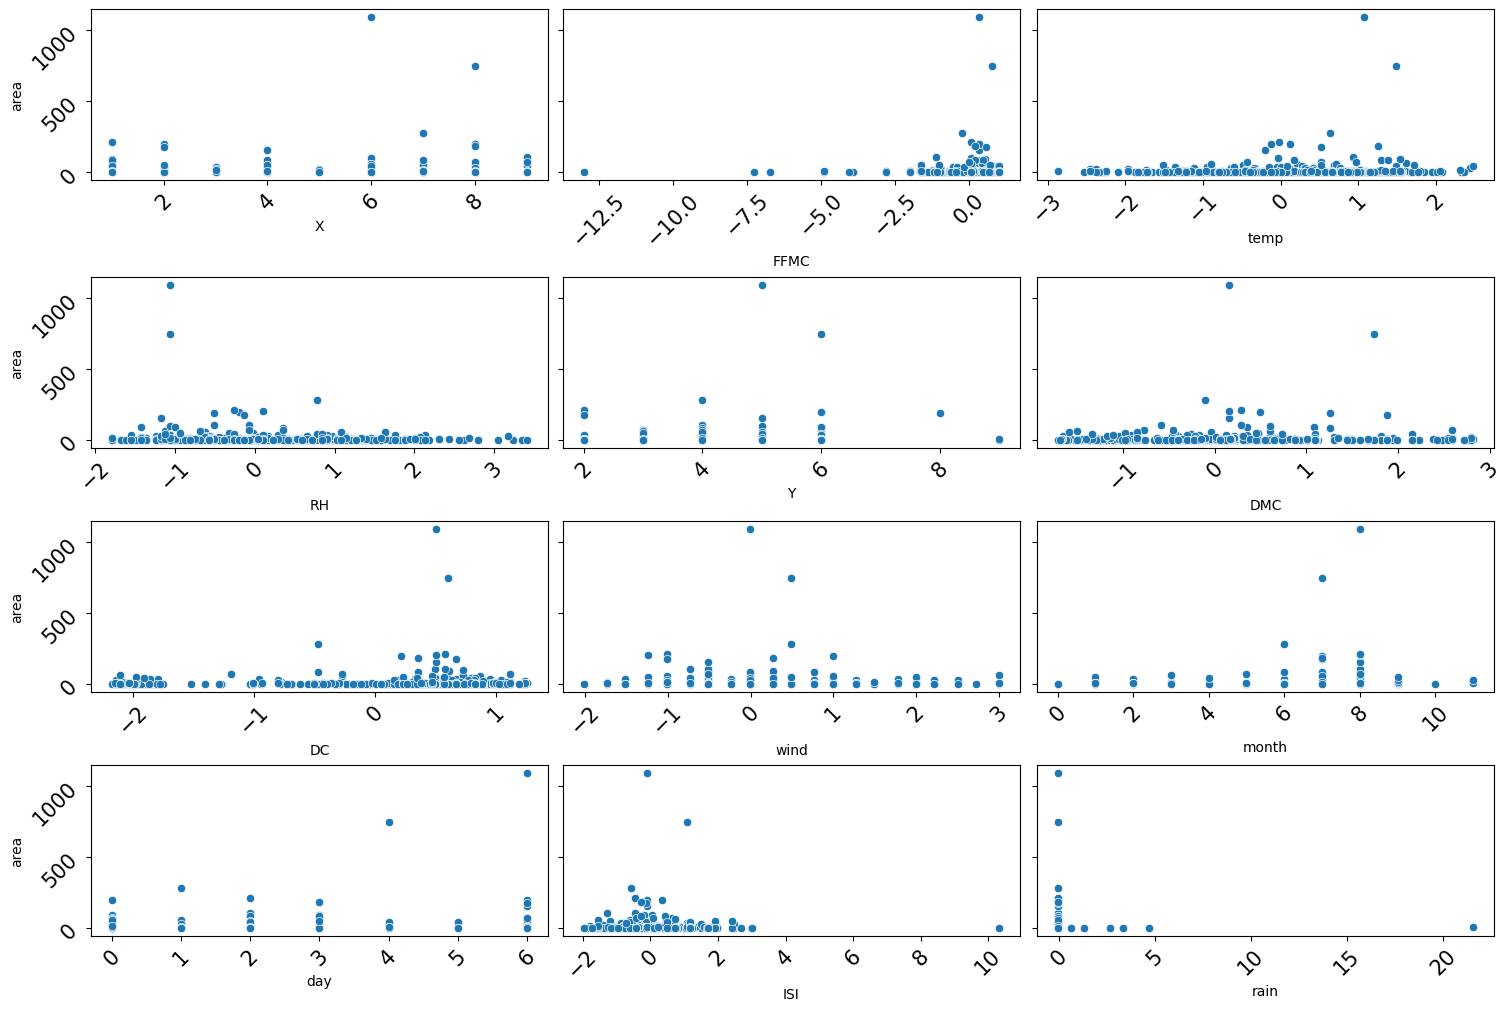

In [368]:
target = "area"
fig, axs = plt.subplots (ncols = 3, nrows = 4, sharey = "all", constrained_layout = True)
fig.set_figwidth(15)
fig.set_figheight(10)
for i , col_name in enumerate(df.columns[:-1]):
    ax = axs[ i % 4 , i % 3]
    ax.tick_params(labelrotation = 45, labelsize = 15)
    sns. scatterplot( x = col_name, y = target, data = df, ax = ax)

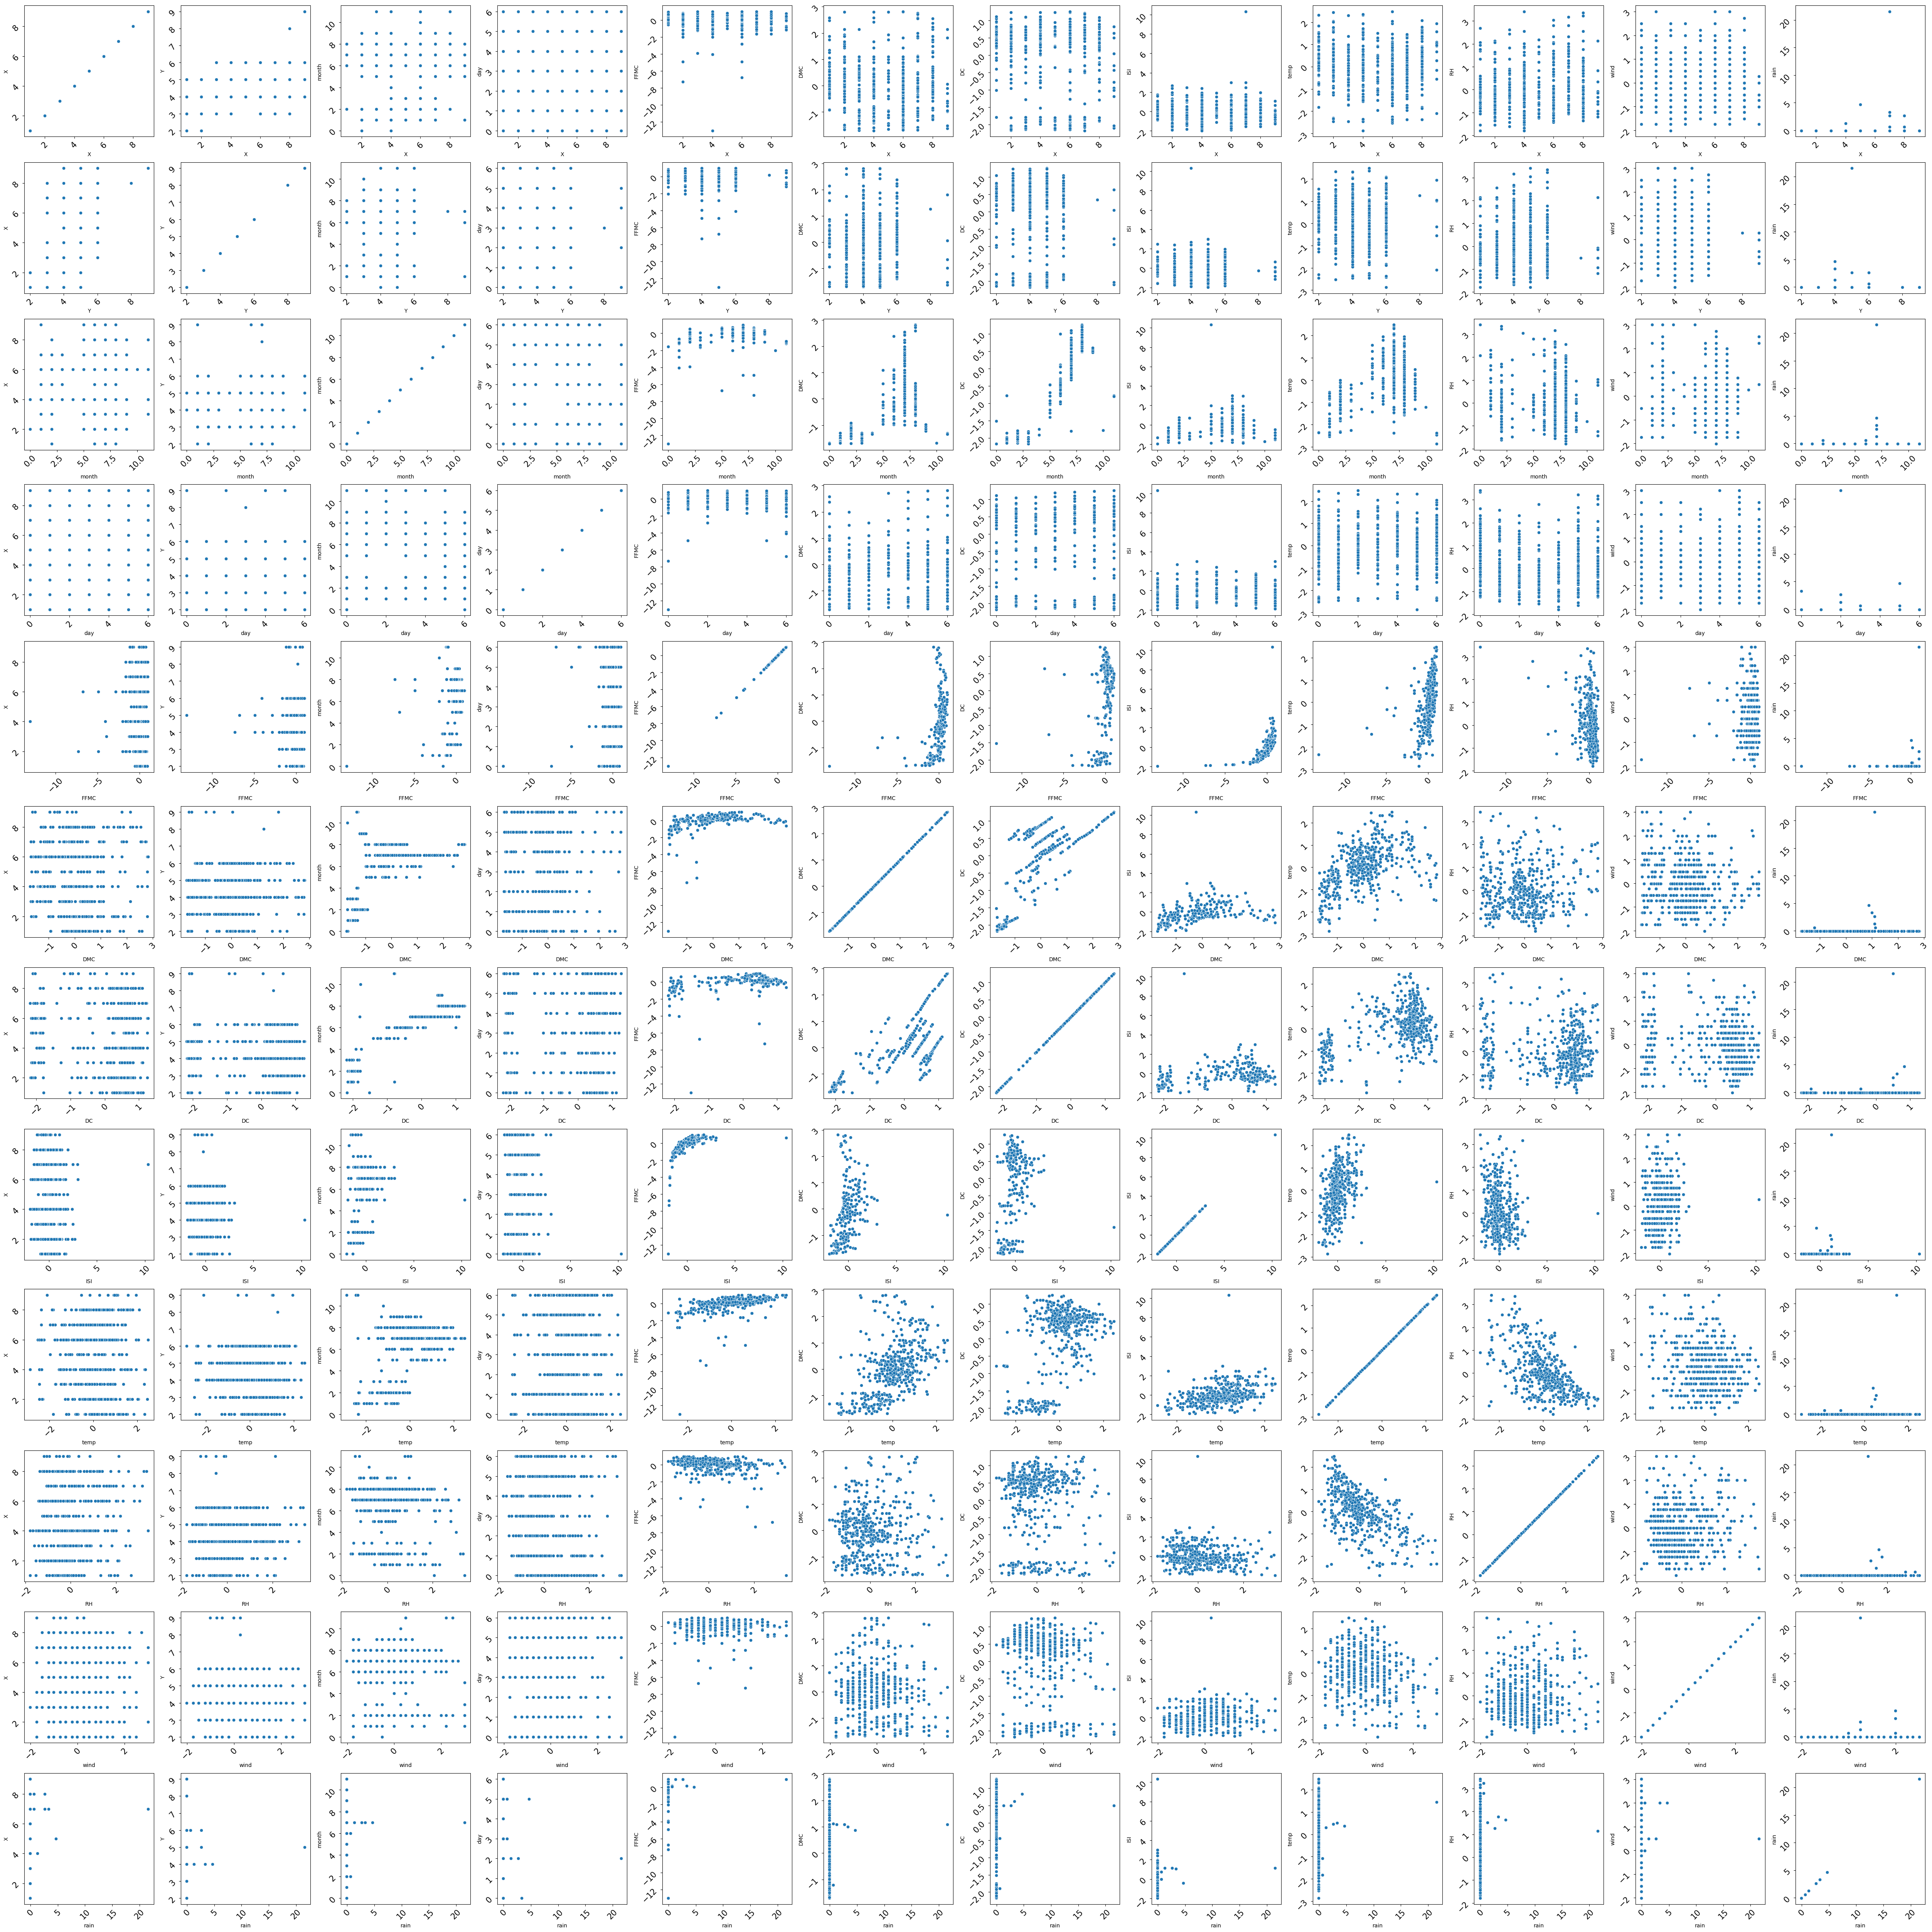

In [369]:

fig, axs = plt.subplots (ncols = 12, nrows = 12, constrained_layout = True)
fig.set_figwidth(50)
fig.set_figheight(50)
for i , col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        ax = axs[ i , j]
        ax.tick_params(labelrotation = 45, labelsize = 15)
        sns. scatterplot( x = col_name_i, y = col_name_j, data = df, ax = ax)

In [370]:
cov = np.zeros((len(df.columns[:-1]), len(df.columns[:-1])))
for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0,1]
    

<Axes: >

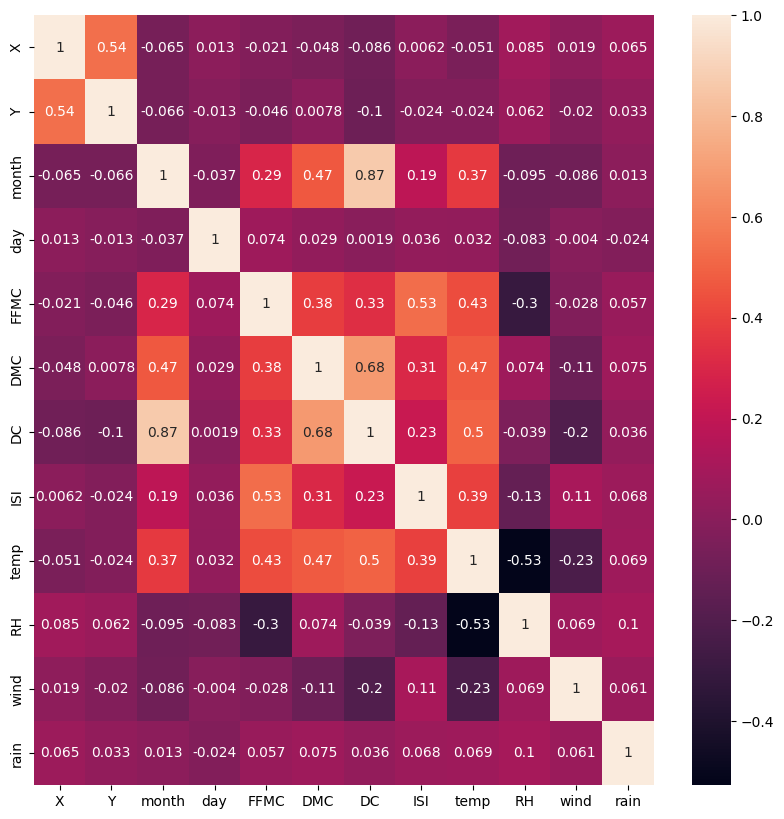

In [371]:
plt.figure ( figsize = (10,10))
sns.heatmap( cov, xticklabels= df.columns[:-1], yticklabels = df.columns[:-1],annot =cov )


In [ ]:
correlation_matrix = df.corr()


In [ ]:
high_corr_features = set()
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Các thuộc tính có collinearity cao cần loại bỏ:", high_corr_features)

In [ ]:
df_cleaned = df.drop(columns=high_corr_features)

In [ ]:
# Chia dữ liệu thành X và y
X = df_cleaned.drop(columns=["area"])  # Giữ lại các biến uncorrelated
y = df_cleaned["area"]

Câu 4


In [372]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [373]:
X_y = df.to_numpy()  
N = df.shape[0]

In [374]:
# Chọn đặc trưng và biến mục tiêu
X = df.drop(columns=["area"])  # Tất cả các cột trừ "area"
y = df["area"]  # Biến mục tiêu

In [375]:
X_train, X_test, Y_train, Y_test = train_test_split(X_y[:, :-1], X_y[:, -1], test_size=0.2, random_state=42, shuffle=False)


In [376]:
# Khởi tạo và huấn luyện mô hình Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [377]:

y_pred = lr.predict(X_test)

In [378]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 79.4242


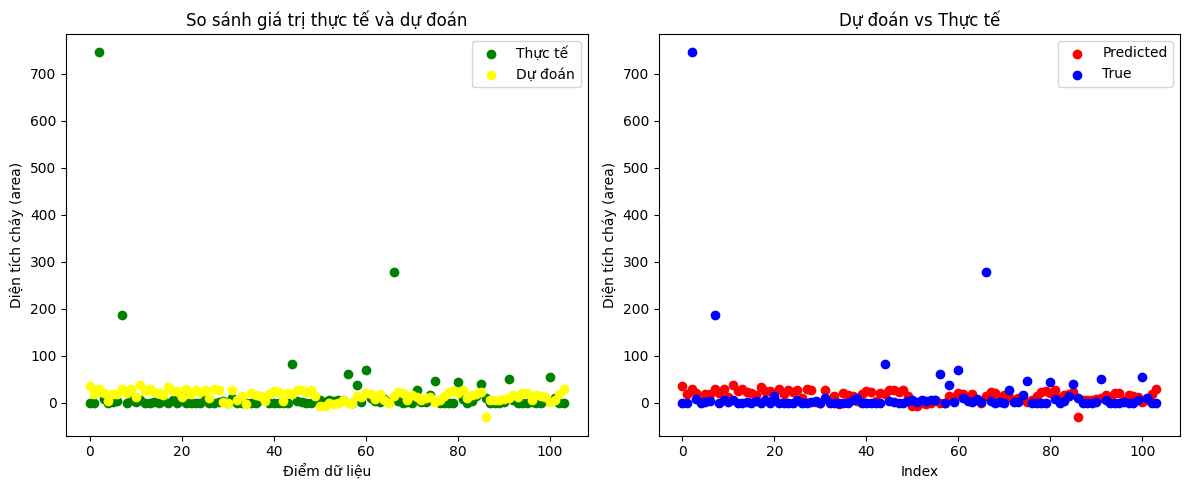

In [384]:
# Tạo hai subplot nằm ngang (1 hàng, 2 cột)
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))  

# Biểu đồ 1: So sánh giá trị thực tế và dự đoán (scatter plot)
axes[0].scatter(range(len(Y_test)), Y_test, color="green", label="Thực tế")
axes[0].scatter(range(len(y_pred)), y_pred, color="yellow", label="Dự đoán")
axes[0].legend()
axes[0].set_xlabel("Điểm dữ liệu")
axes[0].set_ylabel("Diện tích cháy (area)")
axes[0].set_title("So sánh giá trị thực tế và dự đoán")

# Biểu đồ 2: Dự đoán vs Thực tế trên cùng trục x
x_axis = np.array(range(X_test.shape[0]))
axes[1].scatter(x_axis, y_pred, c="r", label="Predicted")
axes[1].scatter(x_axis, Y_test, c="b", label="True")
axes[1].legend()
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Diện tích cháy (area)")
axes[1].set_title("Dự đoán vs Thực tế")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
